In [14]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import os

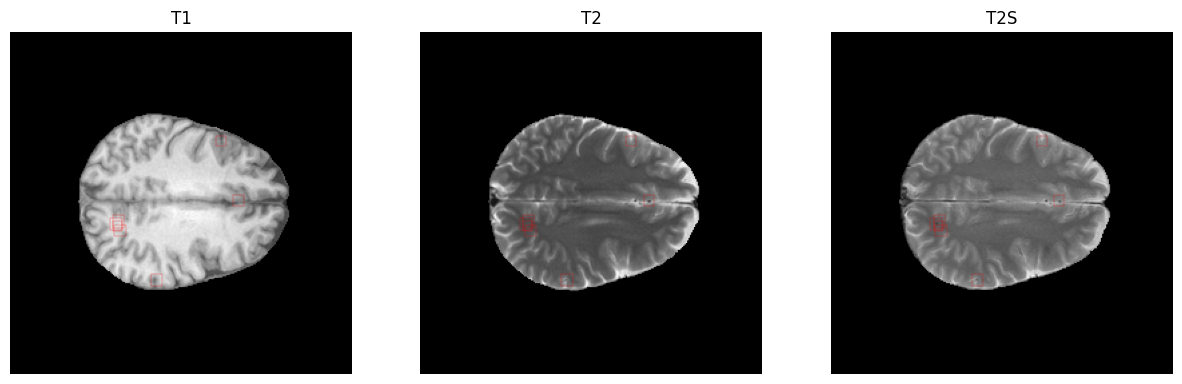

In [15]:
# Load the YOLO output
yolo_output = [
    {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [76.151, 140.655, 4.861, 4.689], "score": 0.51619}, {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [78.713, 143.272, 2.594, 3.431], "score": 0.01816}, {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [168.63, 123.747, 3.89, 3.996], "score": 0.0032}, {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [107.178, 182.593, 4.435, 4.684], "score": 0.00312}, {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [78.597, 138.25, 4.314, 5.857], "score": 0.00198}, {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [155.745, 79.605, 3.438, 3.421], "score": 0.00167}, {"image_id": "sub-317_slice_094", "category_id": 1, "bbox": [79.603, 145.606, 4.73, 4.54], "score": 0.00131},
]

# Root path of the images
root_path = '/mnt/storage/ji/brain_mri_valdo_mayo/YOLO_valdo_stacked_1mm_png_pm2_0205/images/val'

# Function to visualize the image with bounding boxes on separate channels
def visualize_image_with_bboxes(image_id, bboxes):
    image_path = os.path.join(root_path, f"{image_id}.png")
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Separate the channels
    red_channel = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel = image_array[:, :, 2]

    # Plot the channels with bounding boxes
    plt.figure(figsize=(15, 5))

    for i, (channel, cmap, title) in enumerate(zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues'], ['T1', 'T2', 'T2S'])):
        plt.subplot(1, 3, i + 1)
        plt.imshow(channel, cmap='gray')
        for bbox in bboxes:
            x, y, width, height = bbox
            # Increase the size of the bounding box
            rect = plt.Rectangle((x - 2, y - 2), width + 4, height + 4, edgecolor='red', facecolor='none', linewidth=0.2)
            plt.gca().add_patch(rect)
        plt.title(title)
        plt.axis('off')

    plt.show()

# Group bounding boxes by image_id
bboxes_by_image = {}
for item in yolo_output:
    image_id = item['image_id']
    bbox = item['bbox']
    if image_id not in bboxes_by_image:
        bboxes_by_image[image_id] = []
    bboxes_by_image[image_id].append(bbox)

# Visualize each image with its bounding boxes on separate channels
for image_id, bboxes in bboxes_by_image.items():
    visualize_image_with_bboxes(image_id, bboxes)

In [16]:
def find_nonempty_text_files(directory):
    """
    Find all non-empty .txt files in a directory
    Returns a list of file names
    """
    nonempty_files = []
    dir_path = Path(directory)
    
    # Find all .txt files
    for txt_file in dir_path.glob("*.txt"):
        # Check if file is not empty
        if txt_file.stat().st_size > 0:
            with open(txt_file, 'r') as f:
                content = f.read().strip()
                if content:  # Check if there's actual content after stripping whitespace
                    nonempty_files.append(txt_file.name)
    
    return sorted(nonempty_files)  # Sort alphabetically

task = "val"

directory = f"/mnt/storage/ji/brain_mri_valdo_mayo/YOLO_valdo_stacked_1mm_png_pm2/labels/{task}"  # Replace with your folder path
nonempty_files = find_nonempty_text_files(directory)

print(f"Found {len(nonempty_files)} non-empty text files:")
for filename in nonempty_files:
    print(f"- {filename}")

Found 44 non-empty text files:
- sub-103_slice_069.txt
- sub-103_slice_070.txt
- sub-103_slice_071.txt
- sub-103_slice_072.txt
- sub-103_slice_080.txt
- sub-215_slice_075.txt
- sub-215_slice_076.txt
- sub-228_slice_037.txt
- sub-228_slice_038.txt
- sub-228_slice_039.txt
- sub-228_slice_040.txt
- sub-228_slice_041.txt
- sub-228_slice_042.txt
- sub-228_slice_043.txt
- sub-228_slice_044.txt
- sub-228_slice_071.txt
- sub-228_slice_072.txt
- sub-228_slice_073.txt
- sub-228_slice_081.txt
- sub-228_slice_082.txt
- sub-228_slice_083.txt
- sub-228_slice_084.txt
- sub-228_slice_086.txt
- sub-228_slice_087.txt
- sub-228_slice_088.txt
- sub-234_slice_066.txt
- sub-234_slice_078.txt
- sub-234_slice_079.txt
- sub-234_slice_080.txt
- sub-305_slice_037.txt
- sub-305_slice_038.txt
- sub-305_slice_039.txt
- sub-308_slice_027.txt
- sub-308_slice_028.txt
- sub-308_slice_029.txt
- sub-311_slice_039.txt
- sub-311_slice_040.txt
- sub-311_slice_041.txt
- sub-322_slice_070.txt
- sub-322_slice_071.txt
- sub-322